In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib as mlab
import matplotlib.pyplot as plt
import xarray as xr
import os as os
import matplotlib.gridspec as gridspec

import sys
directory_path = os.path.abspath(os.path.join('..'))
if directory_path not in sys.path:
    sys.path.append(directory_path)
    
from Plot_tools import *    

import cartopy.crs as ccrs
import cartopy.feature as cfeature


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def add_fhour(ds):

        filename = ds.encoding["source"].split("_")

        init_time = int(filename[-2])
        fhour     = int(filename[-1][-5:-3])

        ds.coords['fhour'] = fhour
        ds.coords['init_time'] = init_time

        return ds
    
def open_mfdataset_list(run_dir, pattern, model_type):
    """
    Use xarray.open_mfdataset to read multiple netcdf files from a list.
    """
    filelist = os.path.join(run_dir,pattern)
    return xr.open_mfdataset(filelist, preprocess=add_fhour, combine='nested', concat_dim=['fhour'],parallel=True)

def read_wrf(run_dir, pattern, model_type):
        
    #ds   = open_mfdataset_list(run_dir, pattern, model_type)
    ds   = xr.open_dataset(os.path.join(run_dir,pattern))

    w    = ds.W.values
    u    = ds.U.values
    v    = ds.V.values
    lats = ds.XLAT
    lons = ds.XLONG
    
    return u,v,w, lats, lons

In [3]:

u96, v96, w96, lats, lons = read_wrf('/work/wicker/WRF/WRF/run/wrf_96_noIEVA_3', 'wrfout_d01_2011-04-27_01:00:00', 'wrf')
u72, v72, w72, lats, lons = read_wrf('/work/wicker/WRF/WRF/run/wrf_72_noIEVA_3', 'wrfout_d01_2011-04-27_01:00:00', 'wrf')


1.0276566 -2.4403305


Text(0.5, 1.0, 'U field at k = 20     Full Domain')

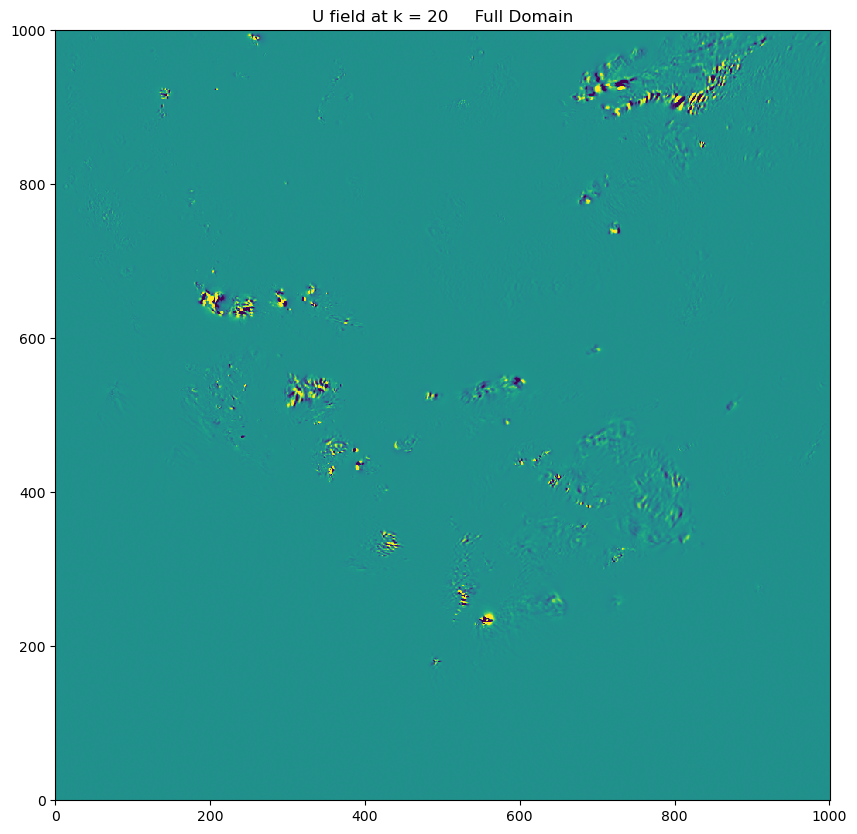

In [4]:
diff = u96 - u72
klevel = 20

print(diff[0,klevel].max(), diff[0,klevel].min())

fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(10,10))

plot = axes.pcolormesh(10*diff[0,klevel], shading='auto', vmax=1, vmin=-1, cmap='viridis')

axes.set_title("U field at k = %d     Full Domain" % klevel)

1.2937977 -1.1884723


Text(0.5, 1.0, 'V field at k = 20     Full Domain')

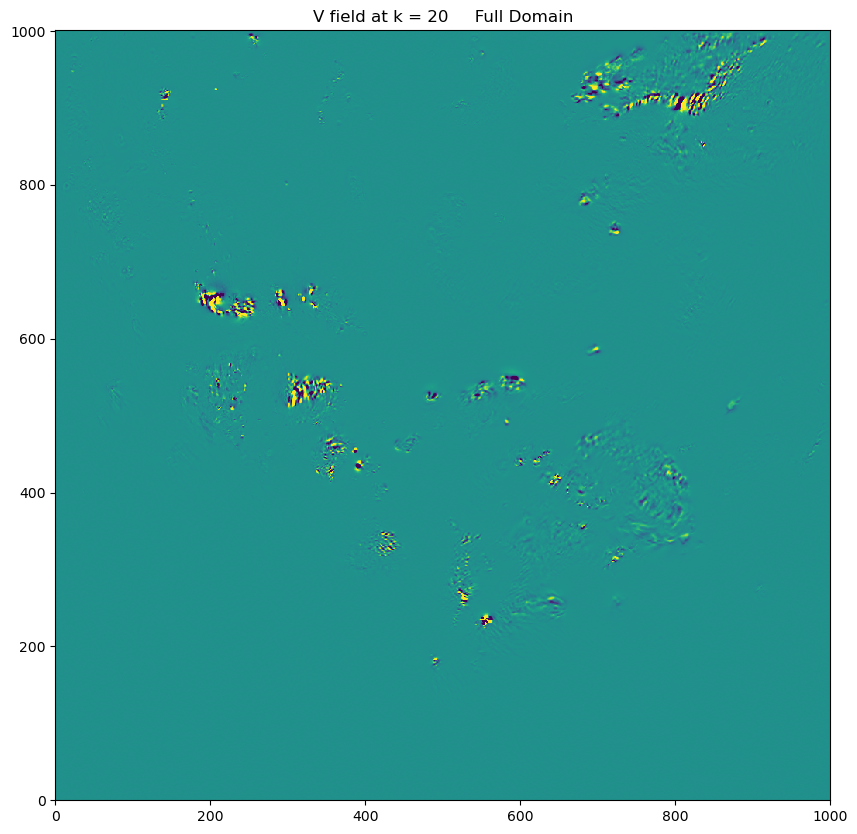

In [5]:
diff = v96 - v72

klevel = 20

print(diff[0,klevel].max(), diff[0,klevel].min())

fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(10,10))

plot = axes.pcolormesh(10*diff[0,klevel], shading='auto', vmax=1, vmin=-1, cmap='viridis')

axes.set_title("V field at k = %d     Full Domain" % klevel)

0.612173 -0.86874866


Text(0.5, 1.0, 'W field at k = 20     Full Domain')

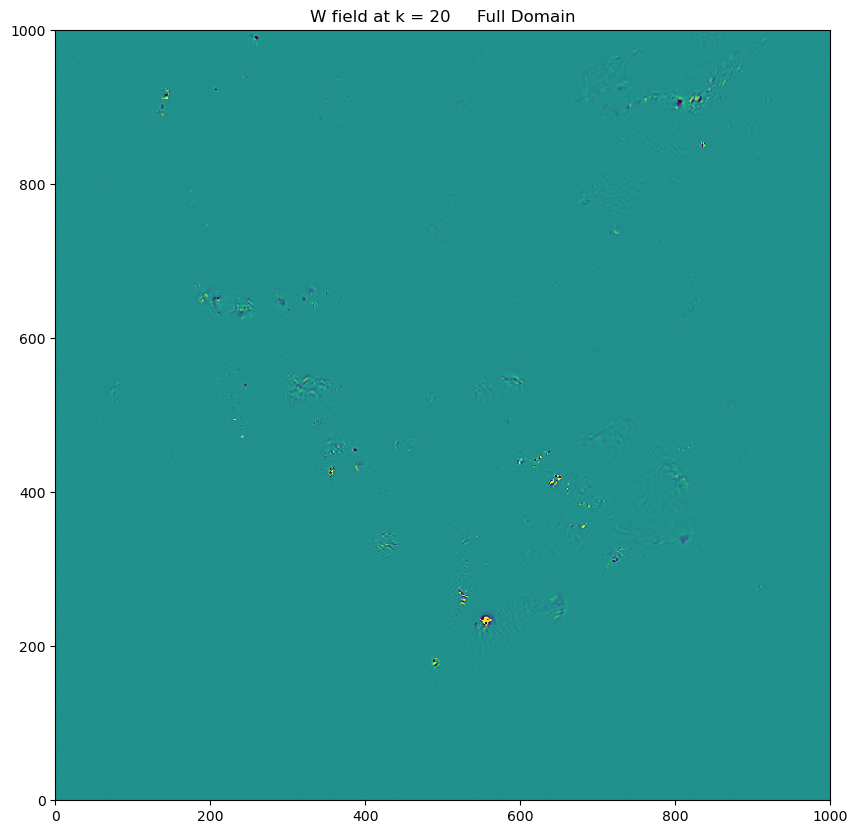

In [6]:
diff = w96 - w72

klevel = 20

print(diff[0,klevel].max(), diff[0,klevel].min())

fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(10,10))

plot = axes.pcolormesh(10*diff[0,klevel], shading='auto', vmax=1, vmin=-1, cmap='viridis')

axes.set_title("W field at k = %d     Full Domain" % klevel)


0.5114174 -0.46195072


Text(0.5, 1.0, 'W field at k = 20   Zoomed Domain')

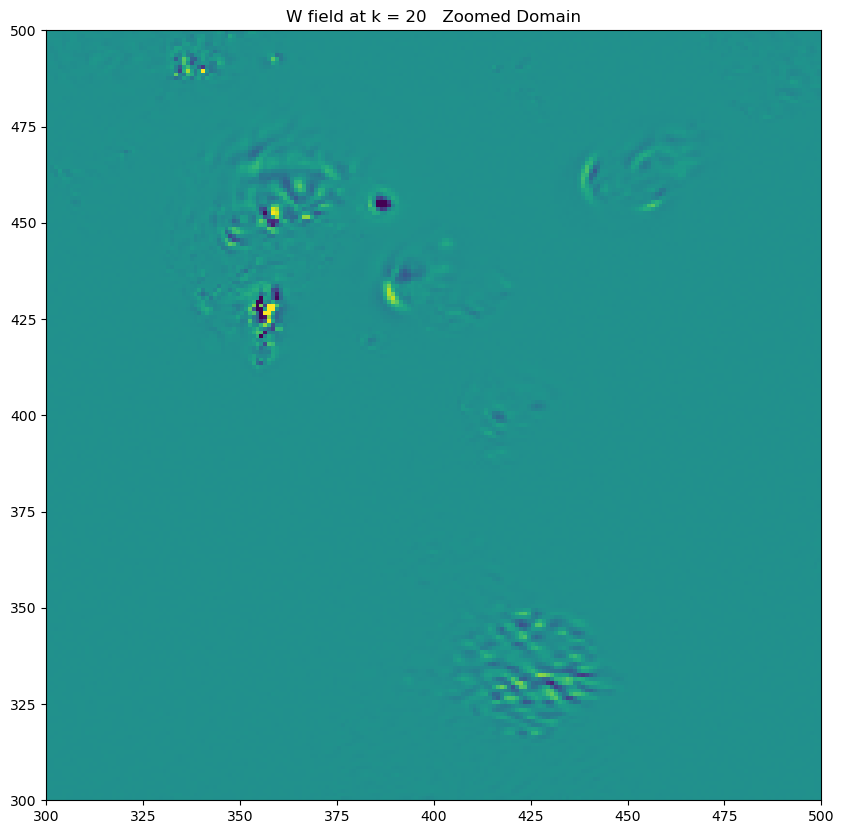

In [11]:
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(10,10))

print(diff[0,klevel,300:500,300:500].max(), diff[0,klevel,300:500,300:500].min())

plot = axes.pcolormesh(10*diff[0,klevel], shading='auto', vmax=1, vmin=-1, cmap='viridis')
axes.set_xlim(300,500)
axes.set_ylim(300,500)
axes.set_title("W field at k = %d   Zoomed Domain" % klevel)

In [25]:
u96, v96, w96, lats, lons = read_wrf('/work/wicker/WRF/WRF/run/wrf_72_noIEVA_3', 'wrfout_d01_2011-04-27_01:00:00', 'wrf')
u72, v72, w72, lats, lons = read_wrf('/work/wicker/WRF/WRF/run/wrf_72_noIEVA_31', 'wrfout_d01_2011-04-27_01:00:00', 'wrf')

diff = w96 - w72

0.5928126 -0.45535755


Text(0.5, 1.0, 'W field at k = 20   Zoomed Domain')

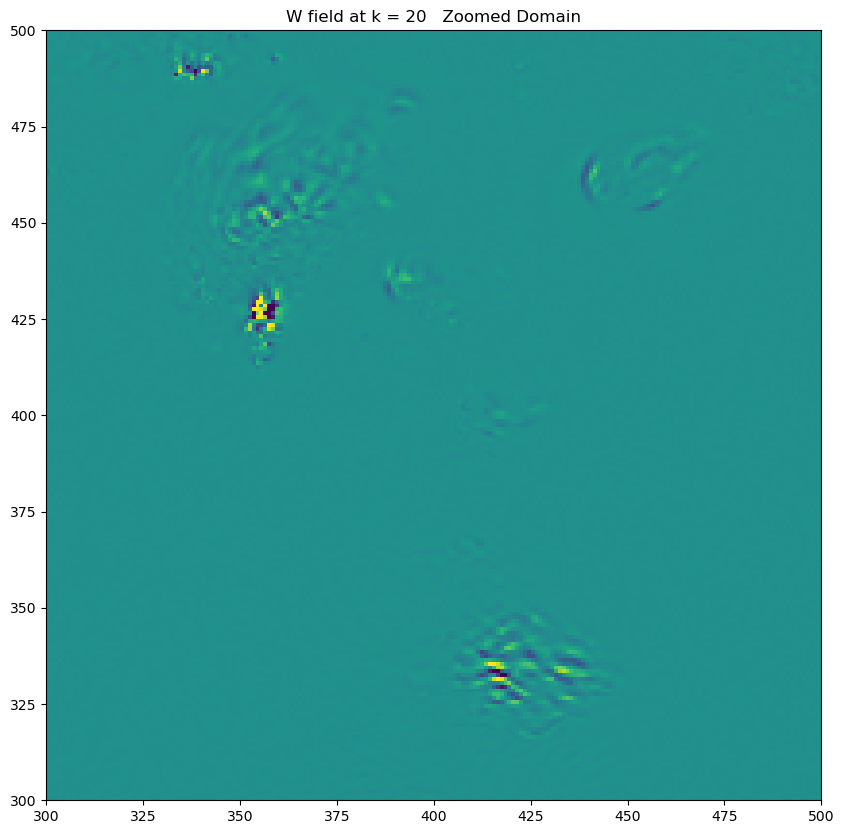

In [26]:
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(10,10))

print(diff[0,klevel,300:500,300:500].max(), diff[0,klevel,300:500,300:500].min())

plot = axes.pcolormesh(10*diff[0,klevel], shading='auto', vmax=1, vmin=-1, cmap='viridis')
axes.set_xlim(300,500)
axes.set_ylim(300,500)
axes.set_title("W field at k = %d   Zoomed Domain" % klevel)